# Covariance v Coherence

In [3]:
import sys

# import h5py
# from IPython.display import HTML, display
import numpy as np
# from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
# from scipy.fft import ifft
# import scipy.signal as ss
# import scipy.linalg as sl
# from sklearn.utils.extmath import randomized_svd
import time

sys.path.append('../')
import functions as f

In [4]:
fsize=15

samples_per_sec=1000
subwindow_len = 2.5
overlap = 0

start_ch = 3100
nchannels = 2000
nsensors = 200

In [11]:
file = r"D:\CSM\Mines_Research\Test_data\Brady Hotspring\PoroTomo_iDAS16043_160314083848.h5"
data,_ = f.loadBradyHShdf5(file,normalize='no')

file = r"D:\CSM\Mines_Research\Test_data\Brady Hotspring\PoroTomo_iDAS16043_160314083918.h5"
data2,_= f.loadBradyHShdf5(file,normalize='no')

data = np.append(data,data2,axis=1)
# data = np.append(data3,data,axis=1)

MemoryError: Unable to allocate 998. MiB for an array with shape (30000, 8721) and data type float32

In [ ]:
t0 = time.time()
coherence_big_event, frequencies = f.welch_coherence(data[start_ch:nchannels+start_ch:int(nchannels/nsensors)], subwindow_len, overlap, sample_interval=0.001)
t1 = time.time()
coherence_time = t1-t0

t0 = time.time()
covariance, frequencies = f.covariance(data[start_ch:nchannels+start_ch:int(nchannels/nsensors)], subwindow_len, overlap, sample_interval=0.001)
t1 = time.time()
covariance_time = t1-t0

In [ ]:
num_frames = coherence_big_event.shape[0]
eig_ratios_coherence = np.empty(num_frames)
eig_ratios_covariance = np.empty(num_frames)

t0 = time.time()
for d in range(num_frames):
    eigenvals, _ = np.linalg.eig(coherence_big_event[d])
    eigenvals = np.sort(eigenvals)[::-1]
    eig_ratios_coherence[d] = eigenvals[0]/np.sum(eigenvals)
t1 = time.time()
coherence_time += t1-t0

t0 = time.time()
for d in range(num_frames):
    eigenvals, _ = np.linalg.eig(covariance[d])
    eigenvals = np.sort(eigenvals)[::-1]
    eig_ratios_covariance[d] = eigenvals[0]/np.sum(eigenvals)
t1 = time.time()
covariance_time += t1-t0

print(f"Coherence time: {coherence_time}")
print(f"Covariance time: {covariance_time}")

C:\Users\issah\AppData\Local\Temp\ipykernel_23872\5930919.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  eig_ratios_covariance[d] = eigenvals[0]/np.sum(eigenvals)


Coherence time: 129.3156397342682
Covariance time: 347.8706021308899


In [ ]:
frequency_extent_ind = -1
plt.plot(frequencies[:frequency_extent_ind], eig_ratios_coherence[:frequency_extent_ind], label="Coherence")
plt.plot(frequencies[:frequency_extent_ind], eig_ratios_covariance[:frequency_extent_ind], label="Covariance")
plt.ylabel(r"$\frac{\lambda_1}{\sum_{i=1}^{n}{\lambda_i}}$",fontsize=fsize)
plt.xlabel("Frequency",fontsize=fsize)
plt.xticks(fontsize=fsize)
plt.yticks(fontsize=fsize)
plt.title("Proportion of $\lambda_1$ in sum of all eigenvalues",fontsize=fsize)
plt.legend(fontsize=fsize)

In [ ]:
t0 = time.time()
norm_win_spectra, frequencies = f.normalised_windowed_spectra(data[start_ch:nchannels+start_ch:int(nchannels/nsensors)], subwindow_len, overlap, sample_interval=0.001)
t1 = time.time()
coherence_time = t1-t0

t0 = time.time()
win_spectra, frequencies = f.windowed_spectra(data[start_ch:nchannels+start_ch:int(nchannels/nsensors)], subwindow_len, overlap, freq=None, sample_interval=0.001)
win_spectra = win_spectra.transpose(2, 1, 0)
t1 = time.time()
covariance_time = t1-t0

print(f"Coherence time: {coherence_time}")
print(f"Covariance time: {covariance_time}")

Coherence time: 0.8169965744018555
Covariance time: 0.38100218772888184


In [12]:
num_frames = coherence_big_event.shape[0]
eig_ratios_coherence = np.empty(num_frames)
eig_ratios_covariance = np.empty(num_frames)

t0 = time.time()
for d in range(num_frames):
    U, S, Vh = np.linalg.svd(norm_win_spectra[d])
    svd_approx2 = S**2
    # svd_approx2 = np.sort(S)[::-1]**2
    eig_ratios_coherence[d] = np.max(svd_approx2)/np.sum(svd_approx2)
t1 = time.time()
coherence_time += t1-t0

t0 = time.time()
for d in range(num_frames):
    U, S, Vh = np.linalg.svd(win_spectra[d])
    svd_approx2 = S**2
    # svd_approx2 = np.sort(S)[::-1]**2
    eig_ratios_covariance[d] = np.max(svd_approx2)/np.sum(svd_approx2)
t1 = time.time()
covariance_time += t1-t0

print(f"Coherence time: {coherence_time}")
print(f"Covariance time: {covariance_time}")

NameError: name 'coherence_big_event' is not defined

<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
C:\Users\issah\AppData\Local\Temp\ipykernel_23872\3090397961.py:8: SyntaxWarning: invalid escape sequence '\l'
  plt.title("Proportion of $\lambda_1$ in sum of all eigenvalues",fontsize=fsize)


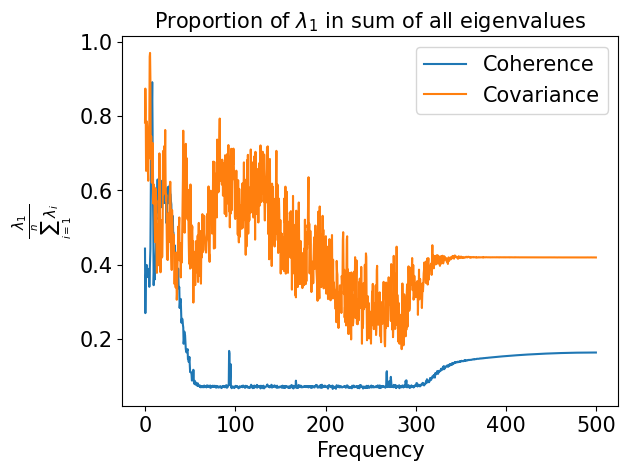

In [24]:
frequency_extent_ind = -1
plt.plot(frequencies[:frequency_extent_ind], eig_ratios_coherence[:frequency_extent_ind], label="Coherence")
plt.plot(frequencies[:frequency_extent_ind], eig_ratios_covariance[:frequency_extent_ind], label="Covariance")
plt.ylabel(r"$\frac{\lambda_1}{\sum_{i=1}^{n}{\lambda_i}}$",fontsize=fsize)
plt.xlabel("Frequency",fontsize=fsize)
plt.xticks(fontsize=fsize)
plt.yticks(fontsize=fsize)
plt.title("Proportion of $\lambda_1$ in sum of all eigenvalues",fontsize=fsize)
plt.legend(fontsize=fsize)

In [5]:
file = r"D:\CSM\Mines_Research\Test_data\Brady Hotspring\PoroTomo_iDAS16043_160312000018.h5"
data_noise,_= f.loadBradyHShdf5(file,normalize='no')

file = r"D:\CSM\Mines_Research\Test_data\Brady Hotspring\PoroTomo_iDAS16043_160312000048.h5"
data_noise2,_= f.loadBradyHShdf5(file,normalize='no')

data_noise = np.append(data_noise,data_noise2,axis=1)

In [7]:
t0 = time.time()
norm_win_spectra_noise, frequencies = f.normalised_windowed_spectra(data_noise[start_ch:nchannels+start_ch:int(nchannels/nsensors)], subwindow_len, overlap, sample_interval=0.001)
t1 = time.time()
coherence_time = t1-t0

t0 = time.time()
win_spectra_noise, frequencies = f.windowed_spectra(data_noise[start_ch:nchannels+start_ch:int(nchannels/nsensors)], subwindow_len, overlap, freq=None, sample_interval=0.001)
win_spectra_noise = win_spectra_noise.transpose(2, 1, 0)
t1 = time.time()
covariance_time = t1-t0

print(f"Coherence time: {coherence_time}")
print(f"Covariance time: {covariance_time}")

Coherence time: 0.8629977703094482
Covariance time: 0.38500165939331055


In [9]:
num_frames = win_spectra_noise.shape[0]
eig_ratios_coherence_noise = np.empty(num_frames)
eig_ratios_covariance_noise = np.empty(num_frames)

t0 = time.time()
for d in range(num_frames):
    U, S, Vh = np.linalg.svd(norm_win_spectra_noise[d])
    svd_approx2 = S**2
    # svd_approx2 = np.sort(S)[::-1]**2
    eig_ratios_coherence_noise[d] = np.max(svd_approx2)/np.sum(svd_approx2)
t1 = time.time()
coherence_time += t1-t0

t0 = time.time()
for d in range(num_frames):
    U, S, Vh = np.linalg.svd(win_spectra_noise[d])
    svd_approx2 = S**2
    # svd_approx2 = np.sort(S)[::-1]**2
    eig_ratios_covariance_noise[d] = np.max(svd_approx2)/np.sum(svd_approx2)
t1 = time.time()
covariance_time += t1-t0

print(f"Coherence time: {coherence_time}")
print(f"Covariance time: {covariance_time}")

Coherence time: 5.8797502517700195
Covariance time: 5.511001825332642


<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
C:\Users\issah\AppData\Local\Temp\ipykernel_5020\365579991.py:8: SyntaxWarning: invalid escape sequence '\l'
  plt.title("Proportion of $\lambda_1$ in sum of all eigenvalues",fontsize=fsize)


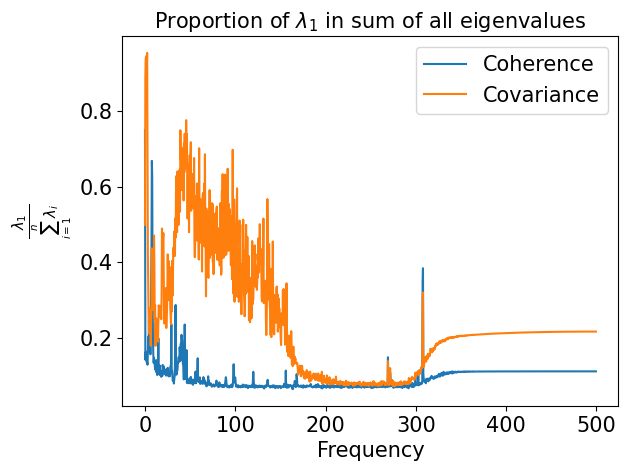

In [10]:
frequency_extent_ind = -1
plt.plot(frequencies[:frequency_extent_ind], eig_ratios_coherence_noise[:frequency_extent_ind], label="Coherence")
plt.plot(frequencies[:frequency_extent_ind], eig_ratios_covariance_noise[:frequency_extent_ind], label="Covariance")
plt.ylabel(r"$\frac{\lambda_1}{\sum_{i=1}^{n}{\lambda_i}}$",fontsize=fsize)
plt.xlabel("Frequency",fontsize=fsize)
plt.xticks(fontsize=fsize)
plt.yticks(fontsize=fsize)
plt.title("Proportion of $\lambda_1$ in sum of all eigenvalues",fontsize=fsize)
plt.legend(fontsize=fsize)